In [1]:
from multiatomic import *

### Example 6: $\mathrm{OH^+}$ Repulsive State, Interpolated, Velocity-Verlet

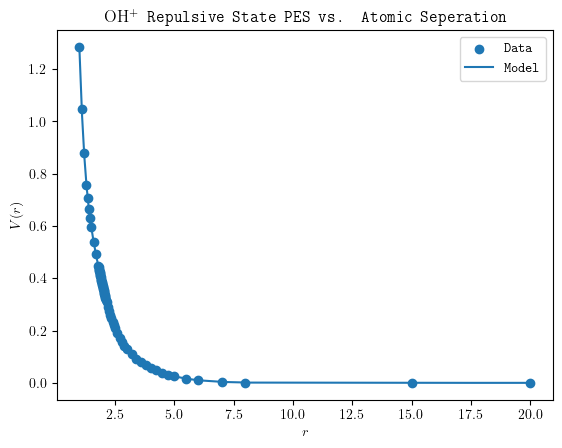

In [2]:
ohpRsData = np.genfromtxt('ohp.repulsive.state.dat', skip_header = 0, dtype = np.longdouble, delimiter = ' ')
xs = ohpRsData[:, 0]
ys = ohpRsData[:, 1]
noPoints = 1000
xPlot = np.linspace(np.min(xs), np.max(xs), noPoints)
yPlot = np.interp(xPlot, xs, ys)
plt.scatter(xs, ys, label = "Data")
plt.plot(xPlot, yPlot, label = "Model")
plt.xlabel("$r$")
plt.ylabel("$V(r)$")
plt.legend()
plt.title("$\mathrm{OH^+}$ Repulsive State PES vs. Atomic Seperation")
plt.savefig("ohpRsPes")
plt.show()

In [3]:
def ohpRsInterpolated(atoms, params) -> float:
    if (debugMode):
        if (not isinstance(atoms, np.ndarray)):
            raise RuntimeError("Invalid atoms. Must be a NumPy array.")
        if (len(atoms) != 2):
            raise RuntimeError("Invalid no. atoms. Must be 2.")
        for atom in atoms:
            if (not isinstance(atom, Atom)):
                raise RuntimeError("Invalid atoms. Must be Atom type.")
    r = atoms[0].getPosition() - atoms[1].getPosition()
    lengthOfR = np.linalg.norm(r)
    return np.interp(lengthOfR, xs, ys)

In [4]:
hMass = 1.00784 # Dalton
oMass = 15.994 # Dalton
atom1 = Atom("Atom1", oMass, np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 0.0]))
atom2 = Atom("Atom2", hMass, np.array([1.0, 0.0, 0.0]), np.array([0.5, 0.0, 0.0]), np.array([0.0, 0.0, 0.0]))
atoms = np.array([atom1, atom2])
potential = Potential(ohpRsInterpolated)
molecularSystem = MolecularSystem(atoms, potential)
integratorName = "velocityVerlet"
filepath = thisdir / 'temp_ohp_rs_interp_vv'
N = 100000
deltaT = 0.001
startTime = time.time()
molecularSystem = simulate(filepath, molecularSystem, integratorName, N, deltaT)
endTime = time.time()

In [5]:
aspath = filepath / 'AtomicSeparations.csv'
avdir = filepath / 'AtomicVelocities'
enpath = filepath / 'Energies.csv'

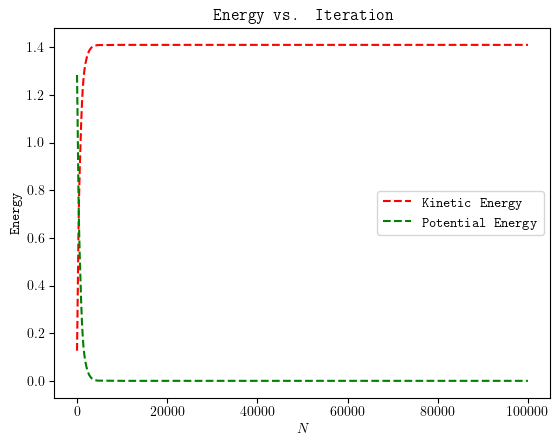

In [6]:
plotEnergies(enpath, "kp")

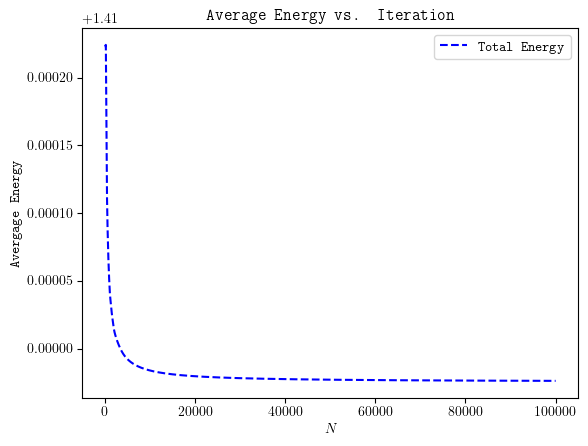

In [7]:
plotRunningAverageEnergies(enpath, "total")

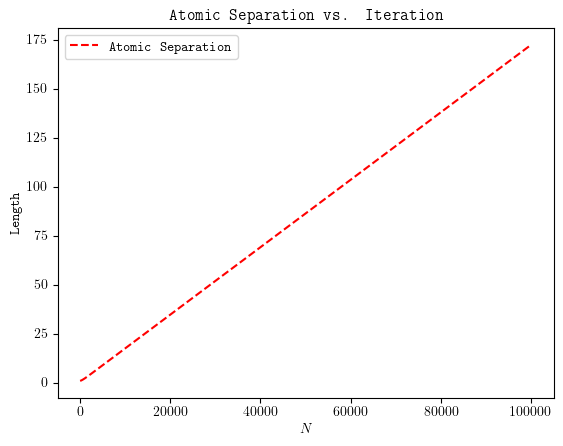

In [8]:
plotAtomicSeparations(aspath, "Atom1-Atom2")

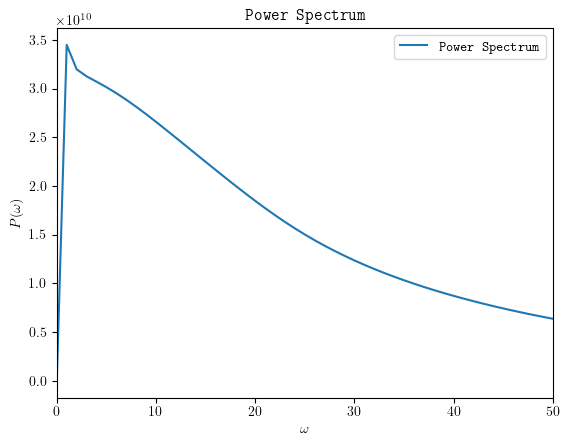

In [9]:
fileNames = molecularSystem.getAtomNames()
vacf = calculateVacf(avdir, fileNames)
powerSpectrum = calculatePowerSpectrum(vacf)
plotPowerSpectrum(avdir, powerSpectrum, [0.0, 50.0], False)

In [10]:
atomicSeparations = pd.read_csv(aspath)
energies = pd.read_csv(enpath)
vv = energies
print("Simulation Time:", round(endTime - startTime, 4), "seconds")
print("Initial Total Energy:", round(energies["TE"].iat[0], 4), "Hartree")
print("Final Total Energy:", round(energies["TE"].iat[-1], 4), "Hartree")
print("Average Total Energy:", round(np.mean(energies["TE"]), 4), u"\u00B1", round(np.std(energies["TE"]), 4), "Hartree")
print("Average Atomic Separation:", round(np.mean(atomicSeparations["Atom1-Atom2"]), 4), u"\u00B1", round(np.std(atomicSeparations["Atom1-Atom2"]), 4), "Bohr")

Simulation Time: 150.9374 seconds
Initial Total Energy: 1.4102 Hartree
Final Total Energy: 1.41 Hartree
Average Total Energy: 1.41 ± 0.0 Hartree
Average Atomic Separation: 86.3773 ± 49.6462 Bohr
